## WEC Analysis - Visualizations

*Created 22/03/2019*

This notebook picks up from the main analysis, where we now have each answer categorised with the main concepts and traits.
We still do a bit of pre-processing on it to group and display properly, then we use Altair to show some summary graphics.

(optionally you can run the last cell in the notebook, after importing the libaries, for some font and color configuration)

In [103]:
import pandas as pd
import altair as alt
import csv
import altair_transform as at

In [4]:
data = pd.read_pickle("WECdf-categorised.pkl")

In [5]:
floatQ = {'C8P': 0.8,'C6P': 0.6,'C4P':0.4,'C2P':0.2,'C0': 0,'C2N': -0.2,'C4N': -0.4,'C6N':-0.6,'C8N': -0.8}
special = ['NEGATE']
concepts = ['RELATION','BEHAVIOUR','SPACE','INFERENCES','GRAPHIC','OTHER']
traits = ['MAGNITUDE','DIRECTION','POSITION','DISCERNIBILITY','REGULARITY']

The next block groups data by concept and traits, as well as negative statements.  
It might be slightly unintuitive at first, but the Negate variable is True when it's a negative statement, and False when it's a positive statement.

In [6]:
#Code to tag negative statements in a Negate column with True or False instead of a trait/concept
cdata = data[data['lemma_cat_tagged'].notnull()][['ResponseId','Question','lemma_cat_tagged']]

#cdata = cdata[cdata.lemma_cat_tagged.apply(lambda x: 'RELATION' in x)]
cdata['concepts'] = cdata['lemma_cat_tagged'].apply(lambda x: [c for c in x if c in concepts])#pd.Series).stack()
cdata['traits'] = cdata['lemma_cat_tagged'].apply(lambda x: [t for t in x if t in traits])
cdata['special'] = cdata['lemma_cat_tagged'].apply(lambda x: True if len([s for s in x if s in special]) > 0 else False)
cs = cdata['concepts'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
ts = cdata['traits'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
sp = cdata['special'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
df2 = pd.merge(sp,  pd.merge(pd.merge(cs,ts,left_index=True,right_index=True),cdata[['ResponseId','Question']],
             left_index=True,right_index=True).rename(columns={'value_x': 'Concept', 'value_y': 'Trait'}),left_index=True,right_index=True).rename(columns={'value': 'Negate'})


cbyt = df2.groupby(['Question','Concept','Trait','Negate'],as_index=False).count()
cbyt.rename(columns={'ResponseId':'Count'}, inplace=True)
cbyt['Correlation'] = cbyt['Question'].apply(lambda x: floatQ[x])
cbyt
#cbyt.to_csv('c_by_t.csv')



,Question,Concept,Trait,Negate,Count,Correlation
0,C0,BEHAVIOUR,DISCERNIBILITY,False,2,0.0
1,C0,BEHAVIOUR,DISCERNIBILITY,True,6,0.0
2,C0,BEHAVIOUR,MAGNITUDE,False,4,0.0
3,C0,BEHAVIOUR,MAGNITUDE,True,2,0.0
4,C0,BEHAVIOUR,POSITION,False,6,0.0
...,...,...,...,...,...,...
389,C8P,SPACE,DIRECTION,False,9,0.8
390,C8P,SPACE,DISCERNIBILITY,False,2,0.8
391,C8P,SPACE,MAGNITUDE,False,14,0.8
392,C8P,SPACE,POSITION,False,18,0.8


In [7]:
#Code to tag negative statements in a Negate column with True or False instead of a trait/concept
cdata = data[data['lemma_cat_tagged'].notnull()][['ResponseId','Question','lemma_cat_tagged']]

cdata['concepts'] = cdata['lemma_cat_tagged'].apply(lambda x: [c for c in x if c in concepts])#pd.Series).stack()
#cdata['traits'] = cdata['lemma_cat_tagged'].apply(lambda x: [t for t in x if t in traits])
cdata['special'] = cdata['lemma_cat_tagged'].apply(lambda x: True if len([s for s in x if s in special]) > 0 else False)
cs = cdata['concepts'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
#ts = cdata['traits'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
sp = cdata['special'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
df2 = pd.merge(sp,  pd.merge(pd.merge(cs,cs,left_index=True,right_index=True),cdata[['ResponseId','Question']],
             left_index=True,right_index=True).rename(columns={'value_x': 'Concept1', 'value_y': 'Concept2'}),left_index=True,right_index=True).rename(columns={'value': 'Negate'})
df2 = df2[df2['Concept1'] != df2['Concept2']]
cbyc = df2.groupby(['Question','Concept1','Concept2','Negate'],as_index=False).count()
cbyc.rename(columns={'ResponseId':'Count'}, inplace=True)
cbyc['Correlation'] = cbyc['Question'].apply(lambda x: floatQ[x])
cbyc[:10]
#cbyt.to_csv('c_by_t.csv')


,Question,Concept1,Concept2,Negate,Count,Correlation
0,C0,BEHAVIOUR,GRAPHIC,False,3,0.0
1,C0,BEHAVIOUR,GRAPHIC,True,3,0.0
2,C0,BEHAVIOUR,INFERENCES,False,5,0.0
3,C0,BEHAVIOUR,INFERENCES,True,7,0.0
4,C0,BEHAVIOUR,RELATION,False,3,0.0
5,C0,BEHAVIOUR,RELATION,True,8,0.0
6,C0,BEHAVIOUR,SPACE,False,4,0.0
7,C0,BEHAVIOUR,SPACE,True,3,0.0
8,C0,GRAPHIC,BEHAVIOUR,False,3,0.0
9,C0,GRAPHIC,BEHAVIOUR,True,3,0.0


In [8]:
#Code to tag negative statements in a Negate column with True or False instead of a trait/concept
cdata = data[data['lemma_cat_tagged'].notnull()][['ResponseId','Question','lemma_cat_tagged']]

cdata['traits'] = cdata['lemma_cat_tagged'].apply(lambda x: [t for t in x if t in traits])
cdata['special'] = cdata['lemma_cat_tagged'].apply(lambda x: True if len([s for s in x if s in special]) > 0 else False)
ts = cdata['traits'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
#ts = cdata['traits'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
sp = cdata['special'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
df2 = pd.merge(sp,  pd.merge(pd.merge(ts,ts,left_index=True,right_index=True),cdata[['ResponseId','Question']],
             left_index=True,right_index=True).rename(columns={'value_x': 'Trait1', 'value_y': 'Trait2'}),left_index=True,right_index=True).rename(columns={'value': 'Negate'})
df2 = df2[df2['Trait1'] != df2['Trait2']]
tbyt = df2.groupby(['Question','Trait1','Trait2','Negate'],as_index=False).count()
tbyt.rename(columns={'ResponseId':'Count'}, inplace=True)
tbyt['Correlation'] = tbyt['Question'].apply(lambda x: floatQ[x])
tbyt[:10]
#cbyt.to_csv('c_by_t.csv')


,Question,Trait1,Trait2,Negate,Count,Correlation
0,C0,DIRECTION,DISCERNIBILITY,False,1,0.0
1,C0,DIRECTION,MAGNITUDE,False,3,0.0
2,C0,DIRECTION,POSITION,False,2,0.0
3,C0,DIRECTION,POSITION,True,1,0.0
4,C0,DIRECTION,REGULARITY,False,2,0.0
5,C0,DISCERNIBILITY,DIRECTION,False,1,0.0
6,C0,DISCERNIBILITY,MAGNITUDE,False,4,0.0
7,C0,DISCERNIBILITY,MAGNITUDE,True,3,0.0
8,C0,DISCERNIBILITY,POSITION,False,4,0.0
9,C0,DISCERNIBILITY,POSITION,True,11,0.0


In [9]:
#Code to tag negative statements in a Negate column with True or False instead of a trait/concept
# FILTERED NUMBER OF CO-OCURRENCES USING MASK
mask = data[data['lemma_cat_tagged'].notnull()]['lemma_cat_tagged'].apply(len) == 3
cdata = data[data['lemma_cat_tagged'].notnull()][['ResponseId','Question','lemma_cat_tagged']].loc[mask]
#print(cdata)
cdata['concepts'] = cdata['lemma_cat_tagged'].apply(lambda x: [c for c in x if c in concepts])#pd.Series).stack()
cdata['traits'] = cdata['lemma_cat_tagged'].apply(lambda x: [t for t in x if t in traits])
cdata['special'] = cdata['lemma_cat_tagged'].apply(lambda x: True if len([s for s in x if s in special]) > 0 else False)
cs = cdata['concepts'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
ts = cdata['traits'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
sp = cdata['special'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
df2 = pd.merge(sp,  pd.merge(pd.merge(cs,ts,left_index=True,right_index=True),cdata[['ResponseId','Question']],
             left_index=True,right_index=True).rename(columns={'value_x': 'Concept', 'value_y': 'Trait'}),left_index=True,right_index=True).rename(columns={'value': 'Negate'})

cooc = df2.groupby(['Question','Concept','Trait','Negate'],as_index=False).count()
cooc.rename(columns={'ResponseId':'Count'}, inplace=True)
cooc['Correlation'] = cooc['Question'].apply(lambda x: floatQ[x])
cooc[:5]
#cbyt.to_csv('c_by_t.csv')


,Question,Concept,Trait,Negate,Count,Correlation
0,C0,BEHAVIOUR,MAGNITUDE,False,1,0.0
1,C0,BEHAVIOUR,MAGNITUDE,True,1,0.0
2,C0,BEHAVIOUR,POSITION,False,1,0.0
3,C0,GRAPHIC,MAGNITUDE,False,1,0.0
4,C0,GRAPHIC,POSITION,False,1,0.0


In [10]:
cooc_count = []
for i in range(1,10):
    mask = data[data['lemma_cat_tagged'].notnull()]['lemma_cat_tagged'].apply(len) == i
    df_cooc = data[data['lemma_cat_tagged'].notnull()].loc[mask]
 #   for name,group in df_cooc:
#        print(name,len(group))
    cooc_count.append(len(df_cooc))

df = data.copy()
d = df['lemma_cat_tagged']
d.loc[d.isnull()] = d.loc[d.isnull()].apply(lambda x: [])
df['lemma_cat_tagged'] = d
df['lemma_cat_tagged'] = df['lemma_cat_tagged'].apply(sorted).apply(tuple)
g = df.groupby(['lemma_cat_tagged']).apply(len).sort_values(ascending=False).reset_index().rename(columns={0: 'count'})[:10]    
#display(g)


dist_comb = alt.Chart(pd.DataFrame(cooc_count).reset_index().rename(columns={0: "value"}).apply(lambda x: x+1 if x.name == "index" else x)).mark_bar().encode(
    x=alt.X('index:O',axis=alt.Axis(title='Concepts or traits mentioned')),
    y=alt.Y('value:Q',axis=alt.Axis(title="Number of answers"))).properties(width=220,height=120)

#comb_rank.configure_axisLeft(labelLimit=1000)
dist_comb
#alt.HConcatChart(hconcat=(comb_rank,dist_comb),spacing=10).configure_axisLeft(labelLimit=1000)
#mask = data[data['lemma_cat_tagged'].notnull()]['lemma_cat_tagged'].apply(len) == 8
#cdata = data[data['lemma_cat_tagged'].notnull()].loc[mask]
#cdata['Answer'].tolist()

/Users/rafael/opt/anaconda3/envs/circles/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


alt.Chart(...)

In [11]:
g

,lemma_cat_tagged,count
0,"(NEGATE, RELATION)",60
1,"(BEHAVIOUR, INFERENCES)",45
2,"(DIRECTION, MAGNITUDE, RELATION)",41
3,"(DIRECTION, RELATION)",35
4,"(INFERENCES, NEGATE, RELATION)",32
5,"(INFERENCES, POSITION)",30
6,"(BEHAVIOUR, DIRECTION, INFERENCES, MAGNITUDE, ...",21
7,"(DISCERNIBILITY, NEGATE, RELATION)",21
8,"(POSITION,)",21
9,"(SPACE,)",19


In [12]:
alt.Chart(g).mark_bar().encode(
    x=alt.X('count:Q',title='Number of answers'),
     y=alt.Y('lemma_cat_tagged:N', scale=alt.Scale(padding=.5),axis=alt.Axis(grid=True,titlePadding=40),title='',sort=alt.EncodingSortField(
            field="count",  # The field to use for the sort
            op="count",  # The operation to run on the field prior to sorting
            order="ascending"  # The order to sort in
        ))).properties(width=150,height=250).configure_axisLeft(labelLimit=1000)

alt.Chart(...)

In [13]:
cooc_count = []
for i in range(1,10):
    mask = data[data['lemma_cat_tagged'].notnull()]['lemma_cat_tagged'].apply(len) == i
    df_cooc = data[data['lemma_cat_tagged'].notnull()].loc[mask].groupby("Question")
    for name,group in df_cooc:
        #print(aname,len(group))
        cooc_count.append((i,floatQ[name],len(group)))
dfcooc = pd.DataFrame(cooc_count).reset_index().rename(columns={0: "num_cat",1: "corr",2: "value"}).apply(lambda x: x+1 if x.name == "index" else x)
cooc3 = alt.Chart(dfcooc[dfcooc['num_cat'] <= 3]).mark_bar().encode(
    x=alt.X('corr:O',title=''),
    y=alt.Y('value:Q',scale=alt.Scale(domain=(0, 60)),axis=alt.Axis(tickCount=5),title="Number of answers")).properties(width=100,height=100).facet(column=alt.Column('num_cat',title=''))
cooc6 = alt.Chart(dfcooc[dfcooc['num_cat'].isin([4,5,6])]).mark_bar().encode(
    x=alt.X('corr:O',title=''),
    y=alt.Y('value:Q',scale=alt.Scale(domain=(0, 60)),axis=alt.Axis(tickCount=5),title="Number of answers")).properties(width=100,height=100).facet(column=alt.Column('num_cat',title=''))
cooc9 = alt.Chart(dfcooc[dfcooc['num_cat'].isin([7,8,9])]).mark_bar().encode(
    x=alt.X('corr:O',title=''),
    y=alt.Y('value:Q',scale=alt.Scale(domain=(0, 60)),axis=alt.Axis(tickCount=5),title="Number of answers")).properties(width=100,height=100).facet(column=alt.Column('num_cat',title=''))
cooc3 & cooc6 & cooc9
#mask = data[data['lemma_cat_tagged'].notnull()]['lemma_cat_tagged'].apply(len) == 8
#cdata = data[data['lemma_cat_tagged'].notnull()].loc[mask]
#cdata['Answer'].tolist()

alt.VConcatChart(...)

Block to group data only by concepts and negative statements

In [14]:
#Code to tag negative statements in a Negate column with True or False instead of a trait/concept
cdata = data[data['lemma_cat_tagged'].notnull()][['ResponseId','Question','lemma_cat_tagged']]

cdata['concepts'] = cdata['lemma_cat_tagged'].apply(lambda x: [c for c in x if c in concepts])#pd.Series).stack()
#cdata['traits'] = cdata['lemma_cat_tagged'].apply(lambda x: [t for t in x if t in traits])
cdata['special'] = cdata['lemma_cat_tagged'].apply(lambda x: True if len([s for s in x if s in special]) > 0 else False)
cs = cdata['concepts'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
#ts = cdata['traits'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
sp = cdata['special'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
df2 = pd.merge(pd.merge(cs,sp,left_index=True,right_index=True),cdata[['ResponseId','Question']],
             left_index=True,right_index=True).rename(columns={'value_x': 'Concept', 'value_y': 'Negate'})

conly = df2.groupby(['Question','Concept','Negate'],as_index=False).count()
conly.rename(columns={'ResponseId':'Count'}, inplace=True)
conly['Correlation'] = conly['Question'].apply(lambda x: floatQ[x])
conly
#cbyt.to_csv('c_by_t.csv')


,Question,Concept,Negate,Count,Correlation
0,C0,BEHAVIOUR,False,8,0.0
1,C0,BEHAVIOUR,True,9,0.0
2,C0,GRAPHIC,False,23,0.0
3,C0,GRAPHIC,True,14,0.0
4,C0,INFERENCES,False,46,0.0
...,...,...,...,...,...
85,C8P,INFERENCES,True,2,0.8
86,C8P,RELATION,False,88,0.8
87,C8P,RELATION,True,1,0.8
88,C8P,SPACE,False,34,0.8


In [15]:
#Code to tag negative statements in a Negate column with True or False instead of a trait/concept
cdata = data[data['lemma_cat_tagged'].notnull()][['ResponseId','Question','lemma_cat_tagged']]

#cdata['concepts'] = cdata['lemma_cat_tagged'].apply(lambda x: [c for c in x if c in concepts])#pd.Series).stack()
cdata['traits'] = cdata['lemma_cat_tagged'].apply(lambda x: [t for t in x if t in traits])
cdata['special'] = cdata['lemma_cat_tagged'].apply(lambda x: True if len([s for s in x if s in special]) > 0 else False)
#cs = cdata['concepts'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
ts = cdata['traits'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
sp = cdata['special'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
df2 = pd.merge(pd.merge(ts,sp,left_index=True,right_index=True),cdata[['ResponseId','Question']],
             left_index=True,right_index=True).rename(columns={'value_x': 'Trait', 'value_y': 'Negate'})

tonly = df2.groupby(['Question','Trait','Negate'],as_index=False).count()
tonly.rename(columns={'ResponseId':'Count'}, inplace=True)
tonly['Correlation'] = tonly['Question'].apply(lambda x: floatQ[x])
tonly[:5]
#cbyt.to_csv('c_by_t.csv')


,Question,Trait,Negate,Count,Correlation
0,C0,DIRECTION,False,4,0.0
1,C0,DIRECTION,True,1,0.0
2,C0,DISCERNIBILITY,False,9,0.0
3,C0,DISCERNIBILITY,True,22,0.0
4,C0,MAGNITUDE,False,41,0.0


### Visual summaries

Overall concepts by levels of correlation

In [125]:
c_bars = alt.Chart(conly).mark_bar().encode(
    x=alt.X('Correlation:O',axis=alt.Axis(title=None)),
    y=alt.Y('sum(Count):Q',scale=alt.Scale(domain=(0, 120)),axis=alt.Axis(title=None,tickCount=5)),
    color=alt.Color('Negate',
                   scale=alt.Scale(
            domain=['false', 'true'],
            range=['#000050', '#eeaa00']),legend=None)
).properties(width=100,height=80).facet(row=alt.Row('Concept:N',title=None),spacing=5).resolve_axis(x='independent')
c_bars

alt.FacetChart(...)

In [38]:
conly_sum = conly.groupby(['Question','Concept','Negate','Correlation'])['Count'].sum()
cprop = pd.DataFrame(conly_sum / conly_sum.groupby(level=1).sum()).reset_index()

In [39]:
cprop[cprop['Concept'] == 'BEHAVIOUR']['Count'].sum()

1.0

In [51]:
c_bars = alt.Chart(cprop

).mark_bar(tooltip=alt.TooltipContent('encoding')).encode(
    x=alt.X('Correlation:O',axis=alt.Axis(title=None)),
    y=alt.Y('Count:Q',scale=alt.Scale(domain=(0, 0.3)), axis=alt.Axis(title=None,tickCount=5)),
    color=alt.Color('Negate',
                   scale=alt.Scale(
            domain=['false', 'true'],
            range=['#000050', '#eeaa00']),
                   legend=None)
).properties(width=100,height=80).facet(row=alt.Row('Concept:N',title=None),spacing=5).resolve_axis(x='independent')
c_bars

alt.FacetChart(...)

In [44]:
alt.Chart(conly
).transform_joinaggregate(
    totalCount='sum(Count)',
      groupby=['Correlation']
).transform_calculate(
    PercentOfTotal="datum.Count / datum.totalCount"
).mark_bar(tooltip=True).encode(
    y=alt.Y('Concept:O',axis=alt.Axis(title=None)),
    x=alt.X('PercentOfTotal:Q'), #,scale=alt.Scale(domain=(0, 120)),axis=alt.Axis(title=None,tickCount=5)),
    #color=alt.Color('Negate',scale=alt.Scale(domain=['false', 'true'], range=['#000050', '#eeaa00']))
).properties(width=100,height=100).facet(column='Correlation:N')

alt.FacetChart(...)

In [18]:
alt.Chart(conly).mark_bar(tooltip=True).encode(
    x=alt.X('Correlation:N',axis=alt.Axis(title=None)),
    y=alt.Y('sum(Count):Q',stack='normalize',axis=alt.Axis(title=None,tickCount=5)),
    color=alt.Color('Concept:N'),
       #            scale=alt.Scale(
       #     domain=['false', 'true'],
        #    range=['#000050', '#eeaa00']))
).properties(width=250,height=150) 
#.facet(column='Correlation:N')

alt.Chart(...)

Concepts by levels of correlation by use of negative statements

In [45]:
#display(conly[conly['Concept'] == 'RELATION']['Count'])
alt.Chart(conly).mark_bar().encode(
    x='Correlation:O',
    y=alt.Y('sum(Count):Q',scale=alt.Scale(domain=(0, 120)),axis=alt.Axis(title=None,tickCount=5))
    
).properties(width=100,height=100).facet(column='Concept:N') # ,row='Negate:N')

alt.FacetChart(...)

In [46]:
tonly_sum = tonly.groupby(['Question','Trait','Negate','Correlation'])['Count'].sum()
tprop = pd.DataFrame(tonly_sum / tonly_sum.groupby(level=1).sum()).reset_index()

In [117]:
t_bars = alt.Chart(tonly).mark_bar().encode(
    x=alt.X('Correlation:O',axis=alt.Axis(title=None)),
    y=alt.Y('sum(Count):Q',scale=alt.Scale(domain=(0, 120)),axis=alt.Axis(title=None,tickCount=5)),
    color=alt.Color('Negate',legend=None,
                   scale=alt.Scale(
            domain=['false', 'true'],
            range=['#000050', '#eeaa00']))
).properties(width=100,height=80).facet(row='Trait:N',spacing=5).resolve_axis(x='independent')
t_bars

alt.FacetChart(...)

In [50]:
t_bars = alt.Chart(tprop, title='test').mark_bar().encode(
    x=alt.X('Correlation:O',axis=alt.Axis(title=None)),
    y=alt.Y('sum(Count):Q',scale=alt.Scale(domain=(0, 0.3)),axis=alt.Axis(title=None,tickCount=5)),
    color=alt.Color('Negate',legend=None,
                   scale=alt.Scale(
            domain=['false', 'true'],
            range=['#000050', '#eeaa00']))
).properties(width=100,height=80).facet(row=alt.Row('Trait:N',title=None),spacing=5).resolve_axis(x='independent')
t_bars.configure_header(
    labelBaseline='middle',
    labelAlign='center',
    labelOrient='top',
    labelAnchor='middle'
)

alt.FacetChart(...)

In [127]:
c_bars = alt.Chart(conly).mark_bar().encode(
    x=alt.X('Correlation:O',axis=alt.Axis(title=None)),
    y=alt.Y('sum(Count):Q',scale=alt.Scale(domain=(0, 120)),axis=alt.Axis(title=None,tickCount=5)),
    color=alt.Color('Negate',
                   scale=alt.Scale(
            domain=['false', 'true'],
            range=['#000050', '#eeaa00']),legend=None)
).properties(width=100,height=80).facet(row=alt.Row('Concept:N',title=None),spacing=5).resolve_axis(x='independent')

t_bars = alt.Chart(tonly).mark_bar().encode(
    x=alt.X('Correlation:O',axis=alt.Axis(title=None)),
    y=alt.Y('sum(Count):Q',scale=alt.Scale(domain=(0, 120)),axis=alt.Axis(title=None,tickCount=5)),
    color=alt.Color('Negate',legend=None,
                   scale=alt.Scale(
            domain=['false', 'true'],
            range=['#000050', '#eeaa00']))
).properties(width=100,height=80).facet(row=alt.Row('Trait:N',title=None),spacing=5).resolve_axis(x='independent')


In [128]:
(c_bars | t_bars).configure_header(
    labelBaseline='middle',
    labelAlign='center',
    labelOrient='top',
    labelAnchor='middle'
).properties(title='Concepts and Traits').configure_title(anchor='middle',align='left',offset=15)

alt.HConcatChart(...)

Concepts by levels of correlation by use of negative statements

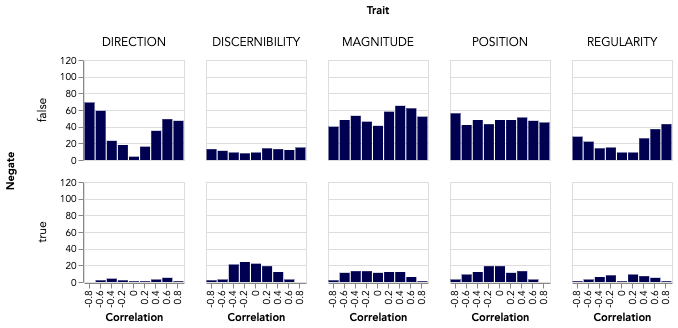

In [41]:
#display(conly[conly['Concept'] == 'RELATION']['Count'])
alt.Chart(tonly).mark_bar().encode(
    x='Correlation:O',
    y=alt.Y('sum(Count):Q',scale=alt.Scale(domain=(0, 120)),axis=alt.Axis(title=None,tickCount=5))
).properties(width=100,height=100).facet(column='Trait:N',row='Negate:N')

In [82]:
alt.Chart(tonly).mark_bar(tooltip=True).encode(
    x=alt.X('Correlation:N',axis=alt.Axis(title=None)),
    y=alt.Y('sum(Count):Q',stack='normalize',axis=alt.Axis(title=None,tickCount=5)),
    color=alt.Color('Trait:N',scale=alt.Scale(scheme='tableau10')),
       #            scale=alt.Scale(
       #     domain=['false', 'true'],
        #    range=['#000050', '#eeaa00']))
).properties(width=250,height=150) 
#.facet(column='Correlation:N')

alt.Chart(...)

Trait by level of correlation:

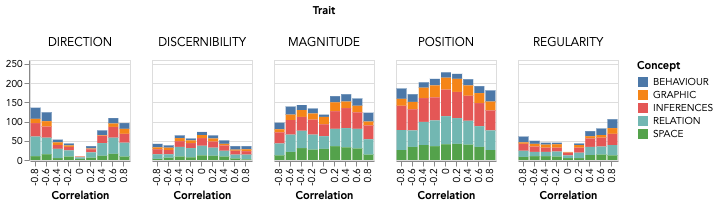

In [19]:
alt.Chart(cbyt).mark_bar().encode(
    x='Correlation:O',
    y=alt.Y('sum(Count):Q',scale=alt.Scale(domain=(0, 250)),axis=alt.Axis(title=None,tickCount=5)),
    color="Concept:N"
).properties(width=100,height=100).facet(column='Trait:N') #,row='Negate:N')

Comparing the distribution of traits by concepts, per level of correlation

In [46]:
alt.Chart(cbyt).transform_joinaggregate(
    totalCount='sum(Count)'    
).transform_calculate(
    PercentOfTotal="datum.Count / datum.totalCount"
).mark_bar().encode(
    x='Correlation:O',
    y=alt.Y('PercentOfTotal:Q', stack="normalize"),
    color='Trait:N',
    #row=alt.Row('Negate:N',sort='ascending'),
    column='Concept',
    tooltip=['Count:Q']
).properties(width=100,height=100)

alt.Chart(...)

Looking at co-occurrences of concepts and traits for levels of correlation, separating positive and negative statements.
Some remarks about the chart:
* Negative statements are used mostly when we might expect, such as discernibility
* Negative statements about regularity/stability are mostly betwen extremes (not with very high or zero correlation).
* Preference for direction for strong correlation for all concepts
* Preference for 

In [121]:
cbyt

,Question,Concept,Trait,Negate,Count,Correlation
0,C0,BEHAVIOUR,DISCERNIBILITY,False,2,0.0
1,C0,BEHAVIOUR,DISCERNIBILITY,True,6,0.0
2,C0,BEHAVIOUR,MAGNITUDE,False,4,0.0
3,C0,BEHAVIOUR,MAGNITUDE,True,2,0.0
4,C0,BEHAVIOUR,POSITION,False,6,0.0
...,...,...,...,...,...,...
389,C8P,SPACE,DIRECTION,False,9,0.8
390,C8P,SPACE,DISCERNIBILITY,False,2,0.8
391,C8P,SPACE,MAGNITUDE,False,14,0.8
392,C8P,SPACE,POSITION,False,18,0.8


In [85]:
cbyt_sum = cbyt.drop('Question',axis=1).groupby(['Correlation','Concept','Trait','Negate'])['Count'].sum()
cbyt_prop = pd.DataFrame(cbyt_sum / cbyt_sum.groupby(level=0).sum()).reset_index()

In [77]:
cbyt

,Question,Concept,Trait,Negate,Count,Correlation
0,C0,BEHAVIOUR,DISCERNIBILITY,False,2,0.0
1,C0,BEHAVIOUR,DISCERNIBILITY,True,6,0.0
2,C0,BEHAVIOUR,MAGNITUDE,False,4,0.0
3,C0,BEHAVIOUR,MAGNITUDE,True,2,0.0
4,C0,BEHAVIOUR,POSITION,False,6,0.0
...,...,...,...,...,...,...
389,C8P,SPACE,DIRECTION,False,9,0.8
390,C8P,SPACE,DISCERNIBILITY,False,2,0.8
391,C8P,SPACE,MAGNITUDE,False,14,0.8
392,C8P,SPACE,POSITION,False,18,0.8


In [86]:
cbyt_prop[(cbyt_prop['Concept'] == 'BEHAVIOUR') & (cbyt_prop['Trait'] == 'MAGNITUDE')]['Count'].sum()

0.323383698246095

In [87]:
cbyt_prop[(cbyt_prop['Concept'] == 'BEHAVIOUR')]['Count'].sum()

1.1209683290132977

In [116]:
cbyt_chart = alt.Chart(cbyt
     ).transform_joinaggregate(
    totalCount='sum(Count)',
      groupby=['Concept','Trait']
).transform_calculate(
    PercentOfTotal="datum.Count / datum.totalCount"
    ).mark_bar(tooltip=True).encode(
    x=alt.X('Correlation:O', axis=alt.Axis(title=None,tickCount=5)),
    y=alt.Y('PercentOfTotal:Q',axis=alt.Axis(title=None,tickCount=5)), #,scale=alt.Scale(domain=(0, 60))),
    color=alt.Color('Negate', scale=alt.Scale(domain=['false', 'true'], range=['#000050', '#eeaa00']))
).properties(
    width=100,height=80
    )

cbyt_faceted = cbyt_chart.facet(
    column=alt.Column('Concept'),
    row=alt.Row('Trait'),
    spacing=10
    ).resolve_axis(x='independent')
cbyt_faceted
#(c_bars & (t_bars | cbyt_chart))
#alt.VConcatChart(vconcat=(c_bars,(t_bars | cbyt_chart)),center=True)

alt.FacetChart(...)

In [113]:
cbyt_t = at.extract_data(cbyt_chart)
cbyt_t[(cbyt_t['Concept'] == 'BEHAVIOUR' )& (cbyt_t['Trait'] == 'DIRECTION')]['PercentOfTotal'].sum()

1.0

In [91]:
cbyt_chart = alt.Chart(cbyt).mark_bar().encode(
    x=alt.X('Correlation:O', axis=alt.Axis(title=None,tickCount=5)),
    y=alt.Y('Count:Q',axis=alt.Axis(title=None,tickCount=5)), #,scale=alt.Scale(domain=(0, 60))),
    color=alt.Color('Negate',
                   scale=alt.Scale(
            domain=['false', 'true'],
            range=['#000050', '#eeaa00']))
).properties(
    width=100,height=100
    ).facet(
    column=alt.Column('Concept',title=''),
    row=alt.Row('Trait',title='')
    ).resolve_axis(x='independent')
cbyt_chart
#(c_bars & (t_bars | cbyt_chart))
#alt.VConcatChart(vconcat=(c_bars,(t_bars | cbyt_chart)),center=True)

alt.FacetChart(...)

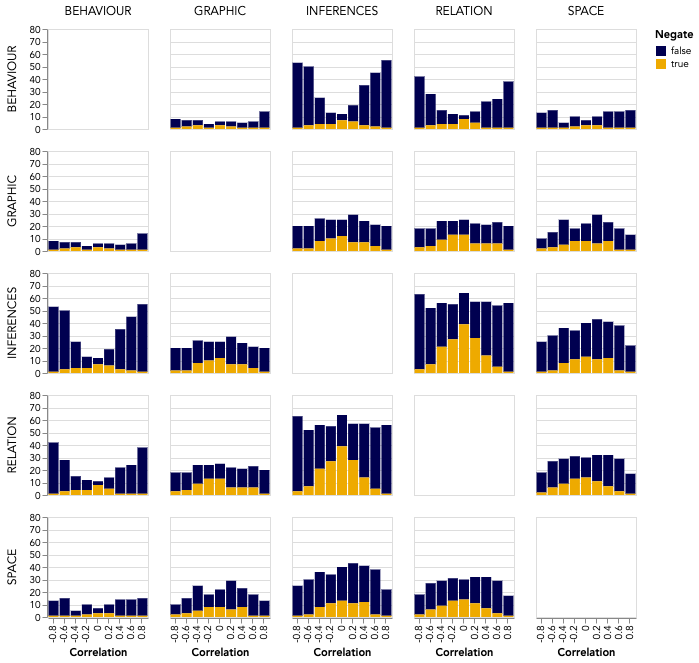

In [125]:
alt.Chart(cbyc).mark_bar().encode(
    x='Correlation:O',
    y=alt.Y('Count:Q',scale=alt.Scale(domain=(0, 80)),axis=alt.Axis(title=None,tickCount=8)),
    color=alt.Color('Negate',
                   scale=alt.Scale(
            domain=['false', 'true'],
            range=['#000050', '#eeaa00']))
).properties(
    width=100,height=100
    ).facet(
    column=alt.Column('Concept1',title=''),
    row=alt.Row('Concept2',title='')
    )

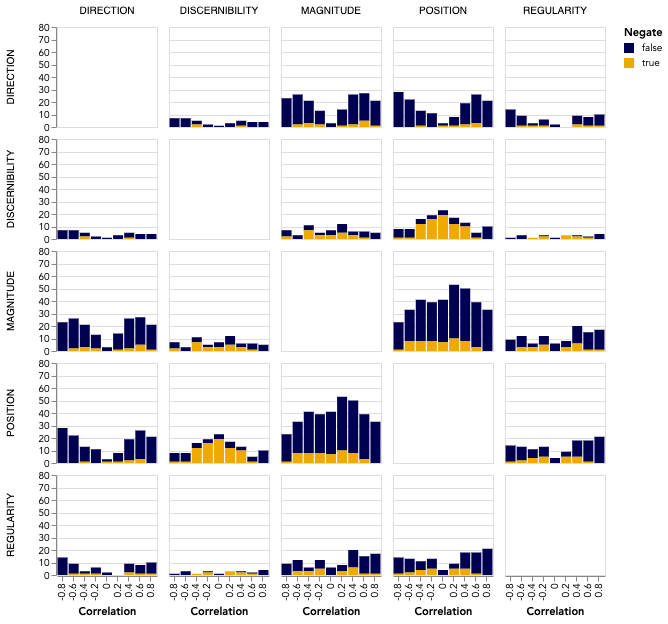

In [276]:
alt.Chart(tbyt).mark_bar().encode(
    x='Correlation:O',
    y=alt.Y('Count:Q',scale=alt.Scale(domain=(0, 80)),axis=alt.Axis(title=None,tickCount=10)),
    color=alt.Color('Negate',
                   scale=alt.Scale(
            domain=['false', 'true'],
            range=['#000050', '#eeaa00']))
).properties(
    width=100,height=100
    ).facet(
    column=alt.Column('Trait1',title=''),
    row=alt.Row('Trait2',title='')
    )

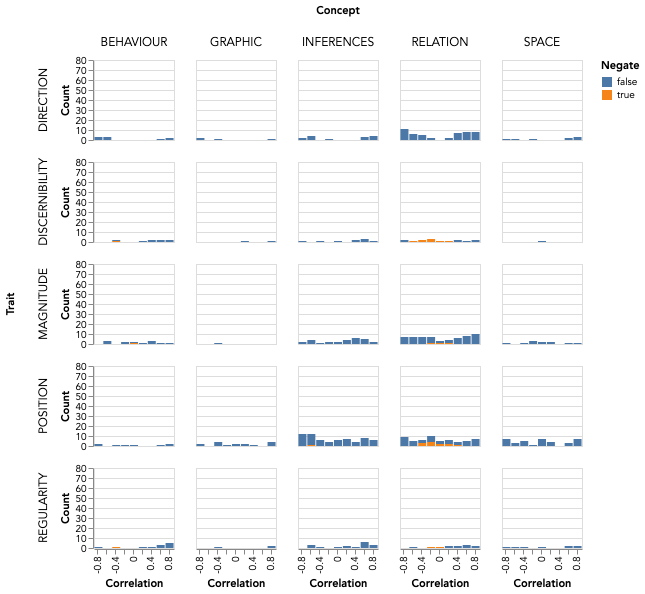

In [23]:
# Only paired co-occurrences
alt.Chart(cooc).mark_bar().encode(
    x='Correlation:O',
    y=alt.Y('Count:Q',scale=alt.Scale(domain=(0, 80)),axis=alt.Axis(tickCount=8)),
    color='Negate:N'
).properties(
    width=80,height=80
    ).facet(
    column='Concept',
    row='Trait'
    )

### Define font and other customizations

In [28]:
def wec_theme():
    font = "Avenir"
    
    return {
        "config" : {
             "mark": {'color': '#000050'},
             "title": {'font': font,  "anchor": "end"},
             "axis": {
                  "labelFont": font,
                  "titleFont": font
             },
             "header": {
                  "labelFont": font,
                  'labelFontSize': 12,
                  "titleFont": font, 
             },
             "legend": {
                  "labelFont": font,
                  "titleFont": font
             }
        }
    }
alt.themes.register('wec_theme',wec_theme)
alt.themes.enable('wec_theme')

ThemeRegistry.enable('wec_theme')

Old matplotlib code:

In [14]:
Qs = ["C8P","C6P","C4P","C2P","C0","C2N","C4N","C6N","C8N"]
orderedQ = {'C8P': '9_C8P','C6P': '8_C6P','C4P': '7_C4P','C2P': '6_C2P','C0': '5_C0','C2N': '4_C2N','C4N': '3_C4N','C6N': '2_C6N','C8N': '1_C8N'}

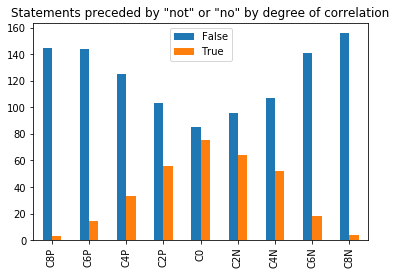

In [16]:
negations = {}
nq = {}
for q in Qs:
    catc0 = data[data['Question'] == q]['lemma_cat_tagged'].dropna()    
    negates = catc0.apply(lambda x: ('NEGATE' in x))
    nq[q] = negates.apply(lambda x: 1 if x is True else 0)
    negations[q] = negates.value_counts().to_dict()
#display(negations)
s = pd.DataFrame(negations).transpose()
fig = s.plot(kind='bar',stacked=False,subplots=False,title='Statements preceded by "not" or "no" by degree of correlation')

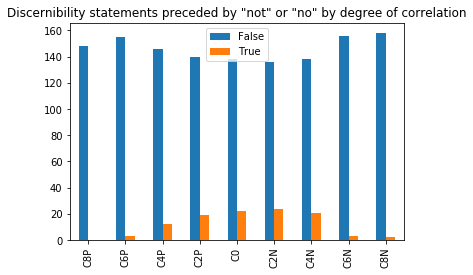

In [17]:
negations = {}
nq = {}
for q in Qs:
    catc0 = data[data['Question'] == q]['lemma_cat_tagged'].dropna()    
    negates = catc0.apply(lambda x: ('NEGATE'in x) and ('DISCERNIBILITY' in x))
    nq[q] = negates.apply(lambda x: 1 if x is True else 0)
    negations[q] = negates.value_counts().to_dict()
#display(negations)

s = pd.DataFrame(negations).transpose()
fig = s.plot(kind='bar',stacked=False,subplots=False,title='Discernibility statements preceded by "not" or "no" by degree of correlation')

This next block follows up from the end of wec-analysis.pynb
We use the %store magic to pass the dataframe between notebooks for convenience

In [87]:
test_data = data[data['lemma_cat_tagged'].notnull()][['ResponseId','Question','lemma_cat_tagged']]

In [109]:
test_data[test_data['lemma_cat_tagged'].apply(lambda x: set(['RELATION','DIRECTION']).issubset(set(x)))]

,ResponseId,Question,lemma_cat_tagged
11,R_24G9kQFpzuPPxYf,C8P,"[MAGNITUDE, DIRECTION, RELATION, BEHAVIOUR]"
12,R_2pM5SlNXYZhwx3t,C8P,"[MAGNITUDE, DIRECTION, RELATION]"
13,R_2aJFz9MQKp5oafm,C8P,"[MAGNITUDE, DIRECTION, RELATION, INFERENCES, R..."
17,R_vZZeRaHXlJooMUN,C8P,"[MAGNITUDE, DIRECTION, RELATION]"
20,R_2DODm93ET1NXqH4,C8P,"[DIRECTION, RELATION, REGULARITY, GRAPHIC]"
22,R_2cpINKT98oRdeIp,C8P,"[MAGNITUDE, DIRECTION, RELATION, INFERENCES, B..."
26,R_2uVAaqth5DbSvxz,C8P,"[RELATION, INFERENCES, POSITION, DISCERNIBILIT..."
33,R_1IXW8iTM0xEldkZ,C8P,"[DIRECTION, REGULARITY, RELATION, SPACE, INFER..."
39,R_21an1yosOJ9AQJs,C8P,"[DIRECTION, RELATION]"
40,R_3HLc7aQUd0Hjy2N,C8P,"[DIRECTION, RELATION]"
